In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [2]:
# The Convolutional Base of the Pre-Trained Model will be added as a Layer in this Model
Conv_Base = ResNet50(include_top = False, weights ='imagenet', input_shape = (150,150, 3),pooling='max',classes=5)

In [3]:
for layer in Conv_Base.layers[:-8]:
    layer.trainable = False

In [4]:
model = Sequential()
model.add(Conv_Base)
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 5, activation = 'sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 24,113,541
Trainable params: 3,941,381
Non-trainable params: 20,172,160
_________________________________________________________________


In [6]:
Train_Datagen =ImageDataGenerator(rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness))

In [7]:
#Val_Datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=tf.keras.applications.resnet.preprocess_input)
Val_Datagen =ImageDataGenerator()


In [8]:
train_dir="C:\\Users\\nithi\\Desktop\\mini-train"
import pathlib
train_dir = pathlib.Path(train_dir)
train_dir

WindowsPath('C:/Users/nithi/Desktop/mini-train')

In [9]:
test_dir="C:\\Users\\nithi\\Desktop\\mini_test"
import pathlib
test_dir= pathlib.Path(test_dir)
test_dir

WindowsPath('C:/Users/nithi/Desktop/mini_test')

In [10]:
train_gen = Train_Datagen.flow_from_directory(directory = train_dir, target_size = (150,150), 
                                       batch_size = 32, class_mode = 'categorical')


Found 791 images belonging to 5 classes.


In [11]:
val_gen = Val_Datagen.flow_from_directory(directory = test_dir, target_size = (150,150), 
                                       batch_size = 32, class_mode = 'categorical')

Found 181 images belonging to 5 classes.


In [12]:
model.compile(optimizer = 'Nadam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(train_gen, epochs = 20, 
                    #batch_size = batch_size,
                    validation_data = val_gen)

Epoch 1/20
15/25 [=================>............] - ETA: 11s - loss: 6.7395 - accuracy: 0.3970

C:\Users\nithi\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 [==============================] - 43s 1s/step - loss: 4.8028 - accuracy: 0.4286 - val_loss: 1.2303 - val_accuracy: 0.5746
Epoch 2/20
25/25 [==============================] - 36s 1s/step - loss: 1.1376 - accuracy: 0.5638 - val_loss: 1.2752 - val_accuracy: 0.5856
Epoch 3/20
25/25 [==============================] - 32s 1s/step - loss: 1.0251 - accuracy: 0.6182 - val_loss: 1.1514 - val_accuracy: 0.6354
Epoch 4/20
25/25 [==============================] - 32s 1s/step - loss: 0.9000 - accuracy: 0.6751 - val_loss: 0.8022 - val_accuracy: 0.6851
Epoch 5/20
25/25 [==============================] - 32s 1s/step - loss: 0.8505 - accuracy: 0.6903 - val_loss: 1.0038 - val_accuracy: 0.6519
Epoch 6/20
25/25 [==============================] - 32s 1s/step - loss: 0.7644 - accuracy: 0.7054 - val_loss: 0.7320 - val_accuracy: 0.6961
Epoch 7/20
25/25 [==============================] - 32s 1s/step - loss: 0.7596 - accuracy: 0.7345 - val_loss: 0.6601 - val_accuracy: 0.7845
Epoch 8/20
25/25 [=============

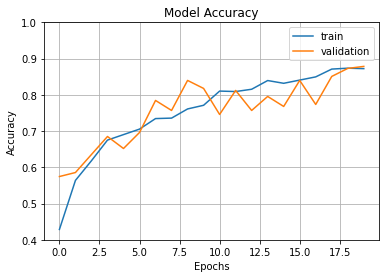

In [14]:
import matplotlib.pyplot as plt
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

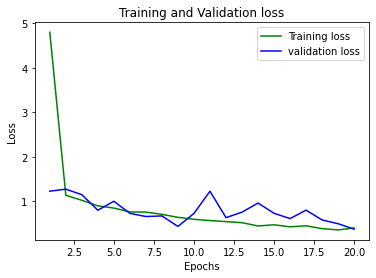

In [15]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
import gradio as gr

In [17]:
car_classes = train_gen .class_indices
labels = dict((v,k) for k,v in car_classes.items())
print(labels)

{0: 'audi', 1: 'bmw', 2: 'lambo', 3: 'merq', 4: 'roll royces'}


In [24]:
def predict_image(img):
  img_4d=img.reshape(-1,150,150,3)
  prediction=model.predict(img_4d)[0]
  return {labels[i] : float(prediction[i]) for i in range(5)}

In [25]:
gr.Interface(fn=predict_image, 
             inputs=gr.Image(shape=(150,150)),
             outputs=gr.Label(num_top_classes=5)).launch( share=True)

Running on local URL:  http://127.0.0.1:7867
Running on public URL: https://24094.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x132052cd190>,
 'http://127.0.0.1:7867/',
 'https://24094.gradio.app')

1/1 [==============================] - 0s 136ms/step
